In [1]:
! git clone https://github.com/Nelson-Gon/cytounet.git

Cloning into 'cytounet'...
remote: Enumerating objects: 114, done.
remote: Counting objects: 100% (114/114), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 840 (delta 65), reused 80 (delta 35), pack-reused 726
Receiving objects: 100% (840/840), 49.95 MiB | 37.07 MiB/s, done.
Resolving deltas: 100% (339/339), done.


In [2]:
%cd cytounet

/kaggle/working/cytounet


In [3]:
from cytounet.model import *
from cytounet.augmentation import *
from cytounet.data import *

Using TensorFlow backend.


In [4]:
data_gen_args = dict(rotation_range=0.1,
                      rescale = 1./255,
                    width_shift_range=0.1,
                    height_shift_range=0.1,
                    shear_range=0.1,
                    zoom_range=0.1,
                    horizontal_flip=True,
                    fill_mode='nearest')

In [5]:
# augmentation will take up a lot of space, only use if you have enough space on disk
#! if [ ! -d "aug" ]; then mkdir aug aug/images aug/masks;fi

In [6]:
my_generator = generate_train_data(8,'examples/legacy/data/train','image','label',data_gen_args,save_to_dir = None, seed= 12,
                              target_size = (256, 256))

In [7]:
# save space on device
#! rm -rf aug

In [8]:
model = unet(input_size = (256, 256, 1),optimiser='Adam', metrics=['accuracy'], loss='binary_crossentropy', 
             learning_rate=1e-3) 

In [9]:
history = model.fit_generator(my_generator,steps_per_epoch= 500,epochs=7)

Epoch 1/7
Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.
500/500 [==============================] - 225s 450ms/step - loss: 0.7546 - accuracy: 0.7375
Epoch 2/7
500/500 [==============================] - 211s 422ms/step - loss: 0.3728 - accuracy: 0.7586
Epoch 3/7
500/500 [==============================] - 211s 423ms/step - loss: 0.3484 - accuracy: 0.7682
Epoch 4/7
500/500 [==============================] - 211s 423ms/step - loss: 0.2983 - accuracy: 0.7834
Epoch 5/7
500/500 [==============================] - 211s 423ms/step - loss: 0.3397 - accuracy: 0.7659
Epoch 6/7
500/500 [==============================] - 211s 422ms/step - loss: 0.5232 - accuracy: 0.7226
Epoch 7/7
500/500 [==============================] - 211s 422ms/step - loss: 0.4170 - accuracy: 0.7497


In [10]:
model.save("unet_segment.hdf5")

In [11]:
test_generator = generate_test_data("examples/legacy/data/test", 30, image_suffix="png")

In [12]:
model = unet(pretrained_weights="unet_segment.hdf5")
results = model.predict_generator(test_generator,30,verbose=1)

30/30 [==============================] - 2s 53ms/step


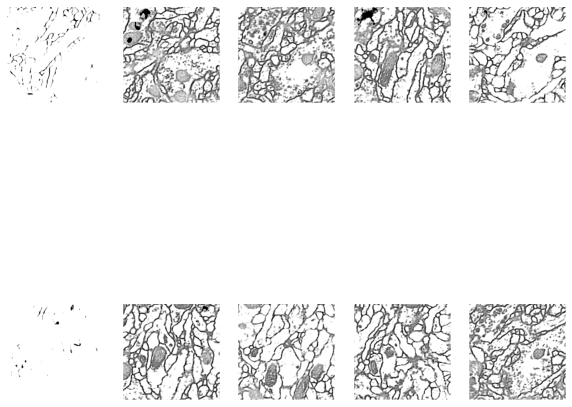

In [13]:
show_images(results, number = 10 )